In [159]:
import os

from datetime import datetime
import tqdm
import math, random

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from PIL import Image


import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

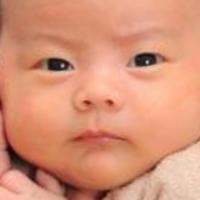

torch.Size([1, 3, 200, 200])


In [19]:
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])

sample = Image.open('face_age/001/1000.png')
sample = resize(sample)
sample_tensor = to_tensor(sample).unsqueeze(0)

display(sample)
print(sample_tensor.shape)

## Generating dataset with proper format

In [188]:
features_set = []
label_set = []
to_tensor = transforms.ToTensor()
resize = transforms.Resize([200, 200])

for folder in os.listdir('face_age/'):
    try:
        for img in os.listdir(f'face_age/{folder}'):
            sample = Image.open(f'face_age/{folder}/{img}')
            sample = resize(sample)
            sample_tensor = to_tensor(sample)
            label_set.append(int(folder))
            features_set.append(sample_tensor)
    except:
        continue

In [189]:
features_set = torch.stack(features_set)

In [190]:
label_set

[24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,
 23,


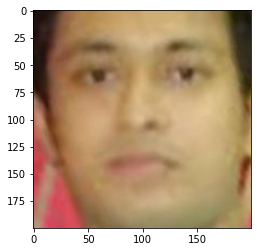

In [191]:
plt.imshow(features_set[10].permute(1, 2, 0))

In [192]:
label_set = torch.as_tensor(label_set,dtype=torch.float)
label_set.shape
label_set[10]

tensor(24.)

In [193]:
train_size = math.floor(0.7*len(features_set))

In [194]:
features_set[0:2]

tensor([[[[0.1216, 0.1137, 0.1059,  ..., 0.2902, 0.2863, 0.2863],
          [0.1137, 0.1059, 0.0980,  ..., 0.2706, 0.2706, 0.2745],
          [0.0980, 0.0941, 0.0863,  ..., 0.2510, 0.2471, 0.2510],
          ...,
          [0.3686, 0.3333, 0.3490,  ..., 0.1882, 0.2157, 0.2353],
          [0.4000, 0.3843, 0.3961,  ..., 0.1961, 0.2118, 0.2196],
          [0.4353, 0.4353, 0.4431,  ..., 0.2118, 0.2157, 0.2157]],

         [[0.0784, 0.0784, 0.0706,  ..., 0.2471, 0.2431, 0.2431],
          [0.0706, 0.0706, 0.0627,  ..., 0.2275, 0.2275, 0.2314],
          [0.0549, 0.0588, 0.0510,  ..., 0.2078, 0.2039, 0.2078],
          ...,
          [0.2784, 0.2431, 0.2588,  ..., 0.1137, 0.1412, 0.1608],
          [0.3098, 0.2941, 0.3059,  ..., 0.1216, 0.1373, 0.1451],
          [0.3451, 0.3451, 0.3529,  ..., 0.1373, 0.1412, 0.1412]],

         [[0.0627, 0.0588, 0.0510,  ..., 0.2314, 0.2275, 0.2275],
          [0.0549, 0.0510, 0.0431,  ..., 0.2118, 0.2118, 0.2157],
          [0.0392, 0.0392, 0.0314,  ..., 0

In [214]:
dataset = TensorDataset(features_set, label_set)
train_data,test_data = random_split(dataset,[train_size,len(dataset)-train_size])

In [215]:
train_loader = DataLoader(train_data,batch_size=501,drop_last=True)
test_loader = DataLoader(test_data,batch_size=501,drop_last=True)

count = 0
for images, labels in test_loader:
    print(images.size(), labels.size())
    count+=1
    if count > 5:
        break

torch.Size([501, 3, 200, 200]) torch.Size([501])
torch.Size([501, 3, 200, 200]) torch.Size([501])
torch.Size([501, 3, 200, 200]) torch.Size([501])
torch.Size([501, 3, 200, 200]) torch.Size([501])
torch.Size([501, 3, 200, 200]) torch.Size([501])


## Model

In [216]:
class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,3,1,padding=1)
        self.conv2 = nn.Conv2d(6,16,3,1,padding=1)
        self.fc1 = nn.Linear(50*50*16,6000)
        self.fc2 = nn.Linear(6000,120)
        self.fc3 = nn.Linear(120, 84)
        self.fc4 = nn.Linear(84,6)
        self.fc5 = nn.Linear(6,1)
        
    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X,2,2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X,2,2)
        X = X.reshape(-1, 50*50*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc3(X))
        X = F.relu(self.fc4(X))
        X = self.fc5(X)
        
        return X

In [217]:
model = Model()
model

Model(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=40000, out_features=6000, bias=True)
  (fc2): Linear(in_features=6000, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=84, bias=True)
  (fc4): Linear(in_features=84, out_features=6, bias=True)
  (fc5): Linear(in_features=6, out_features=1, bias=True)
)

In [218]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [220]:
epochs = 5

train_losses = []
test_losses = []


start_time = datetime.now()
for i in range(1,epochs+1):
    print(f'epoch {i}:')
    for b, (train_data,train_label) in enumerate(train_loader):
        b += 1
        y_pred = model(train_data)
        loss = criterion(y_pred,train_label)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # if b % 10 == 0:
        print(f"Epoch: {i} Batch: {b} Loss: {loss.item()} ")
            
    train_losses.append(loss.detach().numpy())
    
    with torch.no_grad():
        for b, (test_data, test_label) in enumerate(test_loader):
            b += 1
            y_pred = model(test_data)
            loss = criterion(y_pred,test_label)
            
        test_losses.append(loss.detach().numpy())
        
end_time = datetime.now()
print(f"Time taken for model: {str(end_time-start_time)}")

epoch 1:
Epoch: 1 Batch: 1 Loss: 684.1934814453125 
Epoch: 1 Batch: 2 Loss: 1748.3492431640625 
Epoch: 1 Batch: 3 Loss: 581.627685546875 
Epoch: 1 Batch: 4 Loss: 902.01318359375 
Epoch: 1 Batch: 5 Loss: 1104.7513427734375 
Epoch: 1 Batch: 6 Loss: 1131.8604736328125 
Epoch: 1 Batch: 7 Loss: 1258.5078125 
Epoch: 1 Batch: 8 Loss: 1301.8543701171875 
Epoch: 1 Batch: 9 Loss: 1278.1016845703125 
Epoch: 1 Batch: 10 Loss: 1295.577392578125 
Epoch: 1 Batch: 11 Loss: 1268.9715576171875 
Epoch: 1 Batch: 12 Loss: 1034.6319580078125 
Epoch: 1 Batch: 13 Loss: 1149.6759033203125 
epoch 2:
Epoch: 2 Batch: 1 Loss: 1062.8712158203125 
Epoch: 2 Batch: 2 Loss: 802.9675903320312 
Epoch: 2 Batch: 3 Loss: 596.604736328125 
Epoch: 2 Batch: 4 Loss: 742.59375 
Epoch: 2 Batch: 5 Loss: 892.5416259765625 
Epoch: 2 Batch: 6 Loss: 857.366455078125 
Epoch: 2 Batch: 7 Loss: 631.511474609375 
Epoch: 2 Batch: 8 Loss: 664.7489013671875 
Epoch: 2 Batch: 9 Loss: 734.219482421875 
Epoch: 2 Batch: 10 Loss: 810.404052734375 


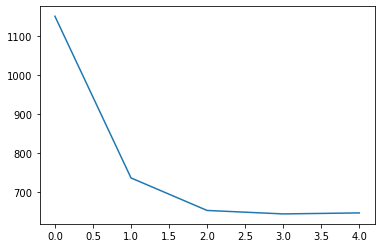

In [222]:
plt.plot(train_losses)

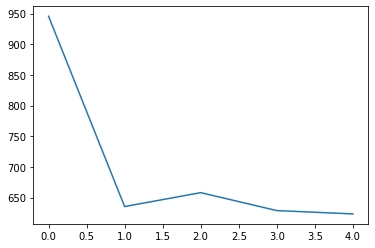

In [223]:
plt.plot(test_losses)

In [243]:
model(features_set[3000])

tensor([[25.3783]], grad_fn=<AddmmBackward0>)

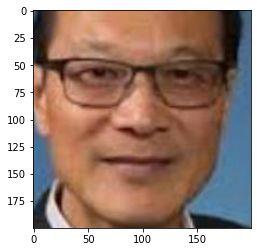

In [244]:
plt.imshow(features_set[3000].permute(1, 2, 0))

In [245]:
label_set[3000]

tensor(55.)

In [224]:
#save model
torch.save(model.state_dict(), 'facial_model.pt')